In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [9]:
path = "images/"

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (6,6)

def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

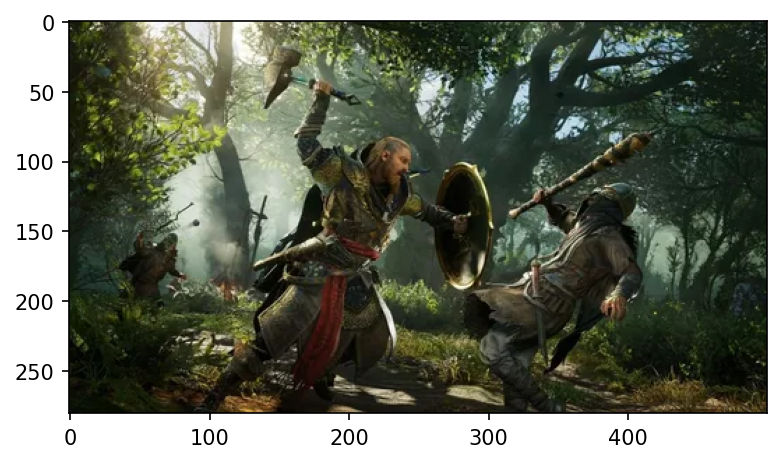

In [11]:
img = cv2.imread('/home/joaolevi/projects/pdi/images/valhala2.webp')
plt.imshow(bgr2rgb(img))
plt.show()

### Store height and width of the image

In [13]:
height, width = img.shape[:2]
quarter_height, quarter_width = height/4, width/4

In [16]:
T = np.float32([[1, 0, quarter_width],
                [0, 1, quarter_height]])
img_translation = cv2.warpAffine(img, T, (width, height))

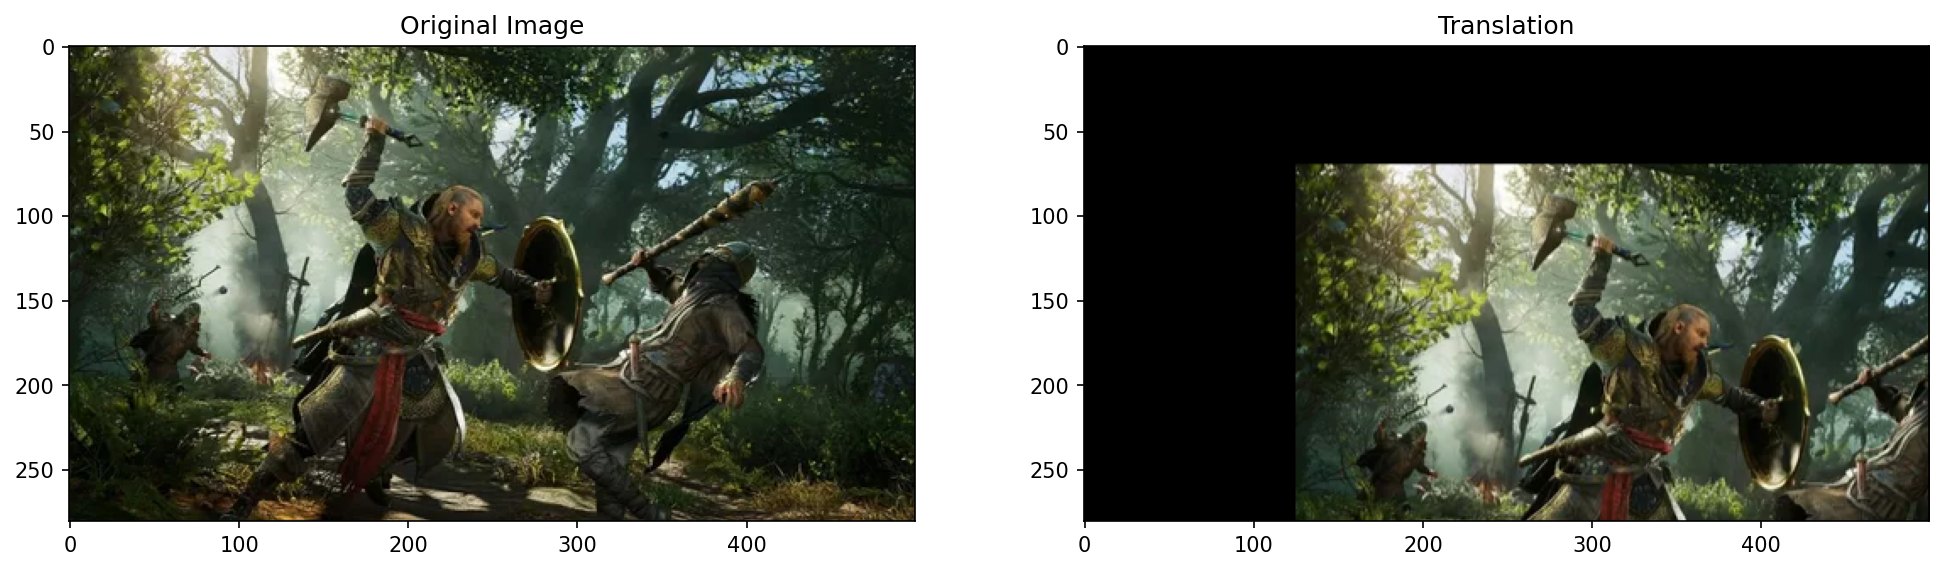

In [19]:
plt.figure(figsize=(16,10))
plt.subplot(121); plt.title('Original Image'); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122); plt.title('Translation'); plt.imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB))
plt.show()

### Rotations

| Cos(θ) | -Sin(θ) | 0 |
|--------|---------|---|
| Sin(θ) | Cos(θ)  | 0 |
| 0      | 0       | 1 |


In [21]:
theta = 45
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), theta, 1)
rotation_matrix

array([[  0.70710678,   0.70710678, -26.12519805],
       [ -0.70710678,   0.70710678, 217.92819254]])

In [22]:
img_rotated = cv2.warpAffine(img, rotation_matrix, (width, height))

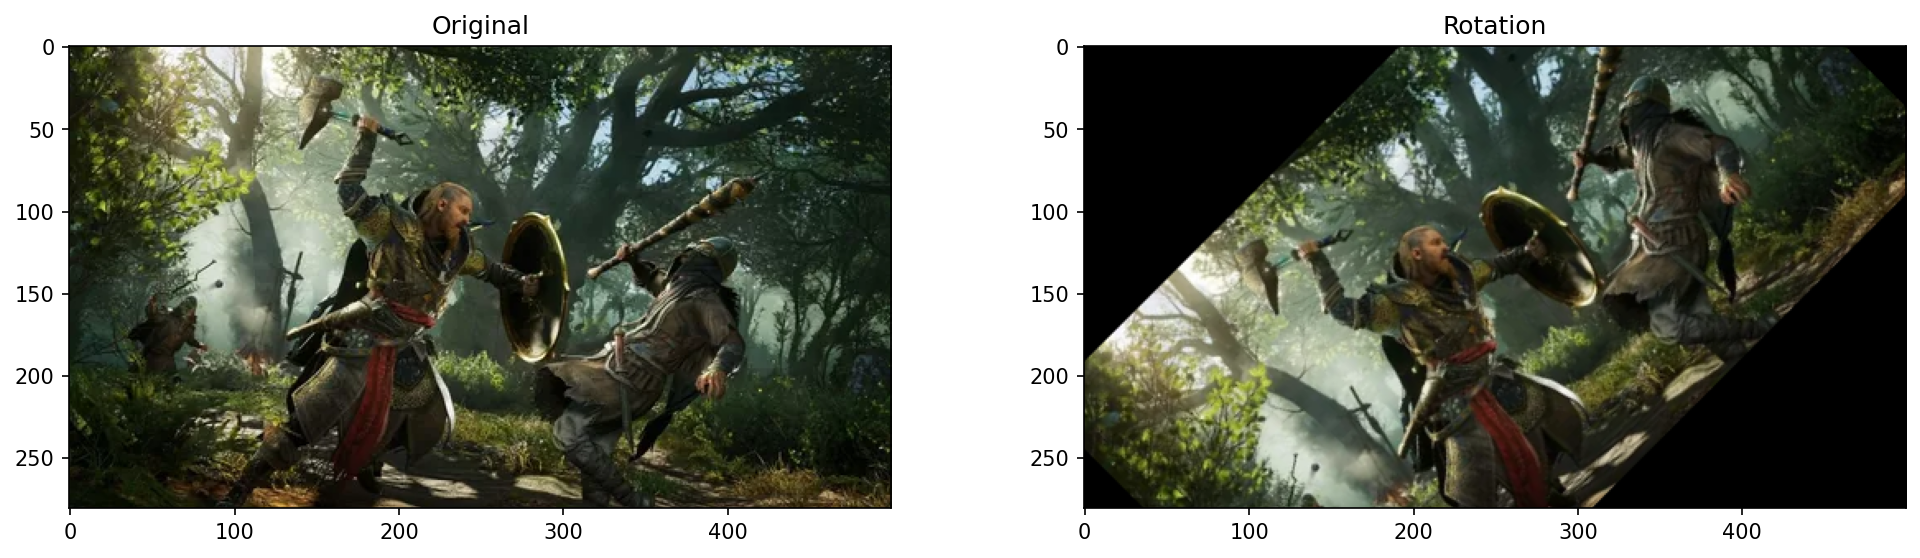

In [23]:
plt.figure(figsize=(16,4))
plt.subplot(121); plt.title("Original"); plt.imshow(bgr2rgb(img))
plt.subplot(122); plt.title("Rotation"); plt.imshow(bgr2rgb(img_rotated))
plt.show()